In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

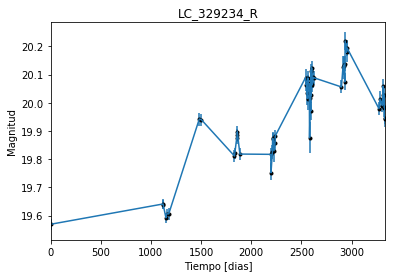

In [2]:
data = np.genfromtxt('LC_329234_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_329234_R')
plt.savefig("LC_329234_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

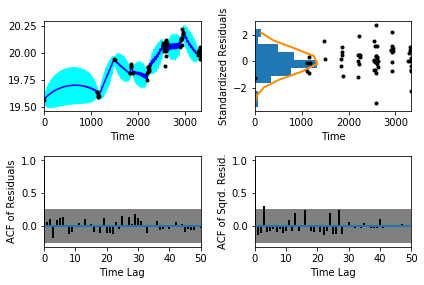

In [5]:
sample.assess_fit()

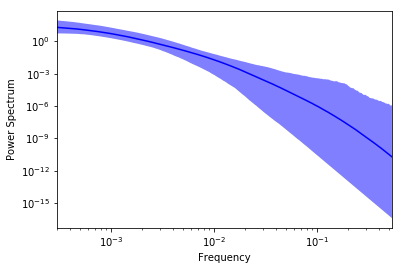

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

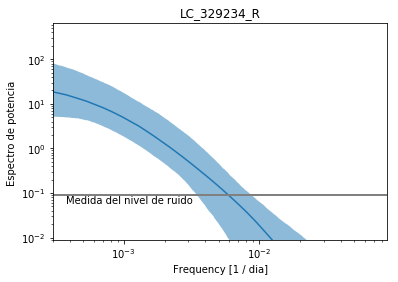

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_329234_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_329234_R')

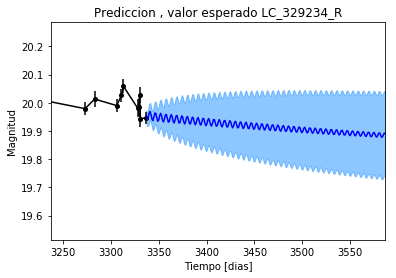

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_329234_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_329234_R')

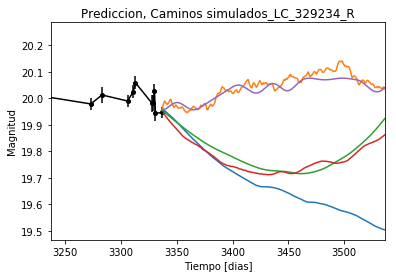

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_329234_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


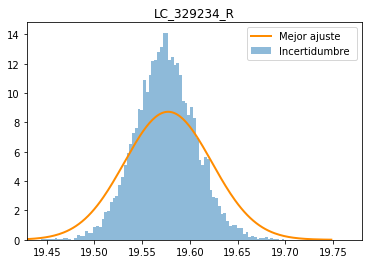

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_329234_R')
plt.savefig("Mejor_ajuste_LC_329234_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_329234_R')

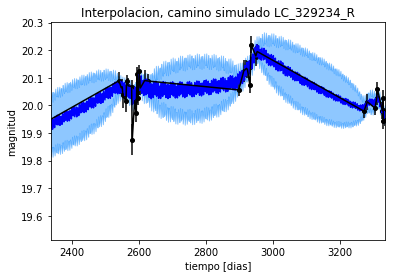

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_R')

Text(0.5,1,'Interpolacion, camino simulado LC_329234_R')

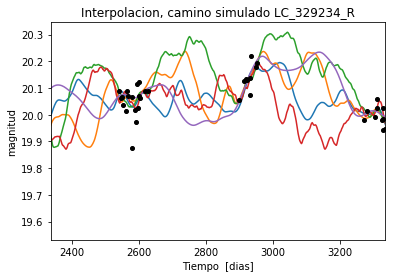

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_329234_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 431.057499034
Median: 0.0193233125783
Standard deviation: 0.234065408985
68% credibility interval: [ 0.00150511  0.30371235]
95% credibility interval: [  4.00972109e-04   8.74479493e-01]
99% credibility interval: [  3.25023074e-04   1.02591815e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 950.626570425
Median: 0.00293487573854
Standard deviation: 0.0871467033686
68% credibility interval: [ 0.00047045  0.03280001]
95% credibility interval: [ 0.00031913  0.27342121]
99% credibility interval: [  3.02470447e-04   6.44128928e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 846.945391629
Median: 0.0253176268593
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 762.396003855
Median: 110.590782996
Standard deviation: 1.75306031262
68% credibility interval: [ 108.6600396   112.01257358]
95% credibility interval: [ 106.23242769  112.87820484]
99% credibility interval: [ 104.13831964  113.60476169]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 397.25231876
Median: 0.948926782089
Standard deviation: 2.42424195528
68% credibility interval: [ 0.08262887  4.56607458]
95% credibility interval: [ 0.02141544  8.29225326]
99% credibility interval: [  0.01224135  11.21673312]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 357.148376618
Median: 0.937580047341
Standard deviation: 9.60468111072
68% credibility interval: [  0.04863917  10.26847428]
95% credibility interval: [  3.70454778

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0502999
Median: 5.86015612302e-47
Standard deviation: 2.09699229135e+47
68% credibility interval: [  4.09420001e-88   2.95703735e-12]
95% credibility interval: [  2.07151788e-159   1.77051042e+000]
99% credibility interval: [  2.39257870e-180   6.13983698e+034]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2265.89701351
Median: 19.835728019
Standard deviation: 0.099765525786
68% credibility interval: [ 19.7399705   19.92517748]
95% credibility interval: [ 19.62924505  20.02420784]
99% credibility interval: [ 19.54271271  20.12067919]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 356.246296356
Median: 0.00743867387842
Standard deviation: 0.25702848916
68% credibility interval: [ 0.          0.36762575]
95% credibility interval: [ 0.          0.93500099]
99% credibility interval: [ 0.          1.03575654]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 356.246296356
Median: 0.00743867387842
Standard deviation: 0.25702848916
68% credibility interval: [ 0.          0.36762575]
95% credibility interval: [ 0.          0.93500099]
99% credibility interval: [ 0.          1.03575654]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1043.23119574
Median: 0.0
Standard deviation: 0.000319875916024
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 762.396003855
Median: 110.590782996
Standard deviation: 1.75306031262
68% credibility interval: [ 108.6600396   112.01257358]
95% credibility interval: [ 106.23242769  112.87820484]
99% credibility interval: [ 104.13831964  113.60476169]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1328.47432638
Median: 0.0386302974558
Standard deviation: 0.0388730134966
68% credibility interval: [ 0.02410307  0.06934279]
95% credibility interval: [ 0.01670087  0.13797301]
99% credibility interval: [ 0.01315122  0.23012137]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1836.72888929
Median: 1.35904378903
Standard deviation: 0.220063383592
68% credibility interval: [ 1.1606423   1.60218489]
95% credibility interval: [ 0.98875873  1.84618231]
99% credibility interval: [ 0.84562535  1.94634835]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2024.04750437
Median: 0.000603910854035
Standard deviation: 0.106839775367
68% credibility interval: [  1.70415316e-05   9.97406352e-03]
95% credibility interval: [  5.08354601e-07   8.96120459e-02]
99% credibility interval: [  1.69193176e-38   5.32918244e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 431.057499034
Median: (-0.121411953678-2.81605482894j)
Standard deviation: 2.18425663072
68% credibility interval: [-1.90828098+0.j         -0.00945686-0.04215428j]
95% credibility interval: [ -5.49451670e+00+0.j          -2.51938206e-03-0.12915727j]
99% credibility interval: [ -6.44603385e+00+0.j          -2.04218020e-03-0.56675735j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 950.626570425
Median: (-0.0184403681188+1.65900648502j)
Standard deviation: 1.70525917959
68% credibility interval: [-0.20608851+0.j -0.00295593+0.j]
95% credibility interval: [-1.71795614+2.78814575j -0.00200516+0.j        ]
99% credibility interval: [ -4.04718141e+00+1.81874838j  -1.90047787e-03+0.j        ]
Posterior summary for parameter